<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
data = []

with open('./sat_scores.csv') as f:
    data = f.readlines()

In [5]:
data = [x.replace('\n', '') for x in data]
head = data[0].split(',')

In [6]:
data = data[1:]
data = [x.replace('\n', '') for x in data]

In [7]:
data = data[1:]
data = [x.replace('\n', '') for x in data]

print(head, data[0:10])

['State', 'Rate', 'Verbal', 'Math'] ['NJ,81,499,513', 'MA,79,511,515', 'NY,77,495,505', 'NH,72,520,516', 'RI,71,501,499', 'PA,71,500,499', 'VT,69,511,506', 'ME,69,506,500', 'VA,68,510,501', 'DE,67,501,499']


In [8]:
sat_dict = { h:[r.split(',')[i] for r in data] for i,h in enumerate(head)}

In [9]:
def print_dict(d, rg):
    for item in d.items():
        print(item[0], item[1][0:rg])
        
print_dict(sat_dict, 5)

State ['NJ', 'MA', 'NY', 'NH', 'RI']
Rate ['81', '79', '77', '72', '71']
Verbal ['499', '511', '495', '520', '501']
Math ['513', '515', '505', '516', '499']


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [30]:
sat_pd = pd.read_csv('./sat_scores.csv')

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [31]:
sat_pd

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [32]:
sat_pd = sat_pd[:51]

In [33]:
sat_pd

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [34]:
sat_pd['Rate'].unique()

array([82, 81, 79, 77, 72, 71, 69, 68, 67, 65, 63, 60, 57, 56, 55, 54, 53,
       52, 51, 34, 33, 31, 26, 23, 18, 17, 13, 12, 11,  9,  8,  7,  6,  5,
        4], dtype=int64)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [35]:
description = {
'State' : ['State Name'],
'Rate' : ['Participation Rate (%)'],
'Verbal' : ['Average Verbal Score by Student'], 
'Math' : ['Average Math Score by student']
    
}

In [36]:
data_dictionary = {
'State' : {'Type' : sat_pd['State'].dtypes, 'Description' : description['State']},
'Rate' : {'Type' : sat_pd['Rate'].dtypes, 'Description' : description['Rate']},
'Verbal' : {'Type' : sat_pd['Verbal'].dtypes, 'Description' : description['Verbal']},
'Math' : {'Type' : sat_pd['Math'].dtypes, 'Description' : description['Math']}, 
'Shape' : sat_pd.shape
}

In [37]:
data_dictionary

{'State': {'Type': dtype('O'), 'Description': ['State Name']},
 'Rate': {'Type': dtype('int64'), 'Description': ['Participation Rate (%)']},
 'Verbal': {'Type': dtype('int64'),
  'Description': ['Average Verbal Score by Student']},
 'Math': {'Type': dtype('int64'),
  'Description': ['Average Math Score by student']},
 'Shape': (51, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

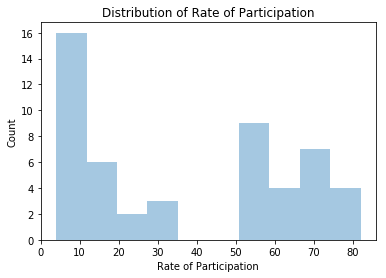

In [39]:
ax = sns.distplot(sat_pd.Rate, kde=False, bins=10)
ax.set_title('Distribution of Rate of Participation')
ax.set_xlabel('Rate of Participation')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

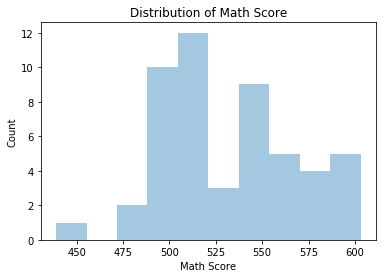

In [40]:
ax = sns.distplot(sat_pd.Math, kde=False, bins=10)
ax.set_title('Distribution of Math Score')
ax.set_xlabel('Math Score')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

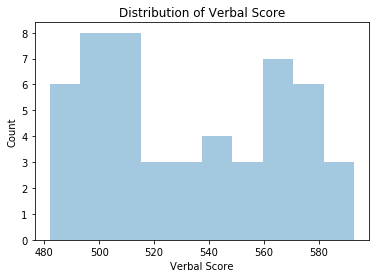

In [41]:
ax = sns.distplot(sat_pd.Verbal, kde=False, bins=10)
ax.set_title('Distribution of Verbal Score')
ax.set_xlabel('Verbal Score')
ax.set_ylabel('Count')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

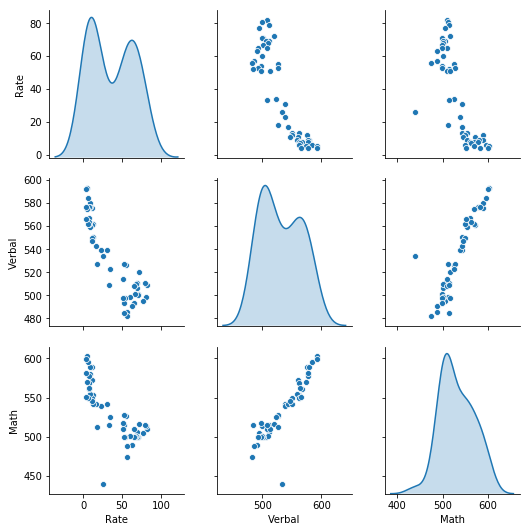

In [42]:
ax = sns.pairplot(sat_pd, markers='o', palette='husl', diag_kind='kde')
ax.savefig("output.png")
# the pairplot gives us a visual snapshot so we can quickly see if there seems to be any correlation between the variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0, 0.5, 'Count')

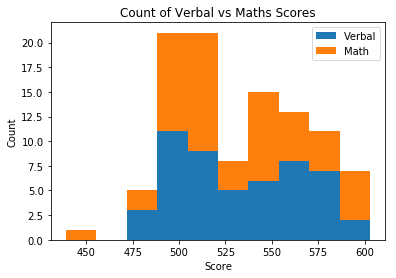

In [43]:
ax = sat_pd[['Verbal', 'Math']].plot.hist(stacked=True)
ax.set_title('Count of Verbal vs Maths Scores')
ax.set_xlabel('Score')
ax.set_ylabel('Count')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Score')

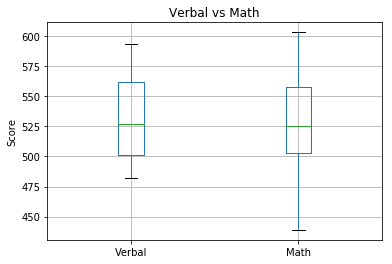

In [44]:
ax = sat_pd[['Verbal', 'Math']].boxplot()
ax.set_title('Verbal vs Math')
ax.set_ylabel('Score')
#the box plot gives a clearer view of the spread of the data.

In [45]:
#the scale of results is out if Rate is included. Both Math and Verbal have values in the 400-500, where Rate is between 0-100. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [46]:
import matplotlib.pyplot as plt

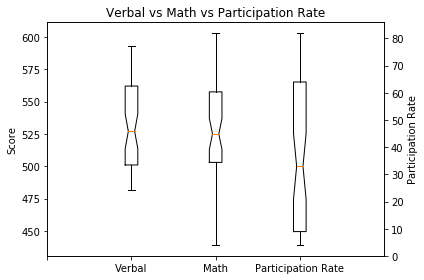

In [47]:
fig, ax = plt.subplots()
ax.boxplot(sat_pd.Verbal, notch=True, positions=[1])
ax.boxplot(sat_pd.Math, notch = True, positions=[2])
ax.set_ylabel('Score')
ax.set_title('Verbal vs Math vs Participation Rate')

ax2 = ax.twinx()
ax2.boxplot(sat_pd.Rate, notch=True, positions=[3])

ax2.set_xticks(range(0,4))
names = ['', 'Verbal', 'Math', 'Participation Rate']
ax2.set_xticklabels(names)
ax2.set_ylabel('Participation Rate')

ax2.set_xlim(0,4)
fig.tight_layout()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [48]:
verb_mean = sat_pd.Verbal.mean()
verb_mean


532.5294117647059

In [49]:
# There are 24 states above the mean which means the distribution is skewed becuase the mean does not equal the median.

sat_pd.groupby('State').apply(lambda x : x['Verbal'] > verb_mean).sum()

24

In [50]:
sat_pd[sat_pd['Verbal']> verb_mean]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [51]:
verb_med = sat_pd.Verbal.median()
verb_med

527.0

In [54]:
#sat_pd[sat_pd['Verbal']> verb_med].count()
sat_pd.groupby('State').apply(lambda x : x['Verbal'] >= verb_med).sum()

# there are 26 states that are above the median, which is exactly what you would expect. The median is the middle value so it should be split evenly

26

In [56]:
sat_pd[sat_pd['Verbal']>= verb_med]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [57]:
new_sat_pd = sat_pd

In [58]:
new_sat_pd['Difference'] = new_sat_pd.Verbal - new_sat_pd.Math

C:\Users\Snoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
new_sat_pd.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [60]:
def top_ten(data):
    data = data.sort_values('Difference', ascending=False)
    return data.head(10)

In [61]:
df1 = top_ten(new_sat_pd)
df1

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [62]:
def bottom_ten(data):
    data = data.sort_values('Difference', ascending=True)
    return data.head(10)

In [63]:
df2 = bottom_ten(new_sat_pd)
df2

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [64]:
sat_pd.corr()
# the correlation matrix tells us how linked the variables are to each other. A value approaching 1 like between Math and Verbal indicates a strong positive linear relationship.
# a value approaching -1 shows a strong negative linear relationship like between Rate and Verbal.

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Difference,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [65]:
sat_pd.describe().T
# count = number of values in the column
# mean = the average value in the column
# std = the standard deviation from the mean of the column
# min = the minimum value in the column
# 25% = the 25th percentile of the column
# 50% = the 50th percentile or the median of the column
# 75% = the 75th percentile of the column
# max = the maximum value in the column

,count,mean,std,min,25%,50%,75%,max
Rate,51.0,37.000000,27.550681,4.0,9.0,33.0,64.0,82.0
Verbal,51.0,532.529412,33.360667,482.0,501.0,527.0,562.0,593.0
Math,51.0,531.843137,36.287393,439.0,503.0,525.0,557.5,603.0
Difference,51.0,0.686275,15.839811,-30.0,-6.0,0.0,4.5,95.0


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [66]:
sat_pd.cov()

# covariance isn't standardized, it stay's in the units it begins in.
    ### how to convert covariance to correlation??? need to work this out???
# correlation gives an easier answer to read whether the variables are related.

,Rate,Verbal,Math,Difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Difference,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [67]:
drug = pd.read_csv('./drug-use-by-age.csv')
drug.shape

(17, 28)

In [68]:
drug.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0,5.0,6.0,5.0,8.0,15.0,36.0,-
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,-,3.0,-,9.5,1.0,21.0,10.0,2.0,5.0,17.0,5.0,6.0,6.0,15.0,48.0,62.0,-


In [69]:
drug['meth-frequency'].unique()

array(['-', '5.0', '24.0', '10.5', '36.0', '48.0', '12.0', '105.0', '2.0',
       '46.0', '21.0', '30.0', '54.0', '104.0'], dtype=object)

In [70]:
drug.replace('-', 0, inplace=True)

In [72]:
drug[['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']] = drug[['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']].astype(float)

In [73]:
# I assumed that the missing data values were null values and replaced them all with 0.
# I converted all the rows except Age to floats.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [74]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [75]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


In [78]:
drug.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.388318,0.281797,0.574629,0.007798,...,-0.166039,0.021226,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.510735,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,...,0.589219,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,...,0.251554,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,...,0.971733,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,...,0.609618,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,...,0.865626,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997
cocaine-frequency,0.388318,0.260301,0.317172,-0.154879,0.265193,-0.077848,1.000000,0.307329,0.872260,-0.127827,...,-0.152548,-0.154491,-0.080911,-0.103142,-0.230324,-0.183692,-0.080921,0.240660,0.021109,0.761572
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.307329,1.000000,0.333440,0.750790,...,0.603003,0.140619,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.404741,0.438421,0.091676
crack-frequency,0.574629,0.337802,0.364267,-0.143323,0.273167,-0.076876,0.872260,0.333440,1.000000,-0.217811,...,-0.187504,-0.115546,-0.080356,-0.215342,-0.219458,-0.125405,-0.070355,0.346559,0.129511,0.602101
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.127827,0.750790,-0.217811,1.000000,...,0.775321,0.112525,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.058656,0.333649,-0.023708


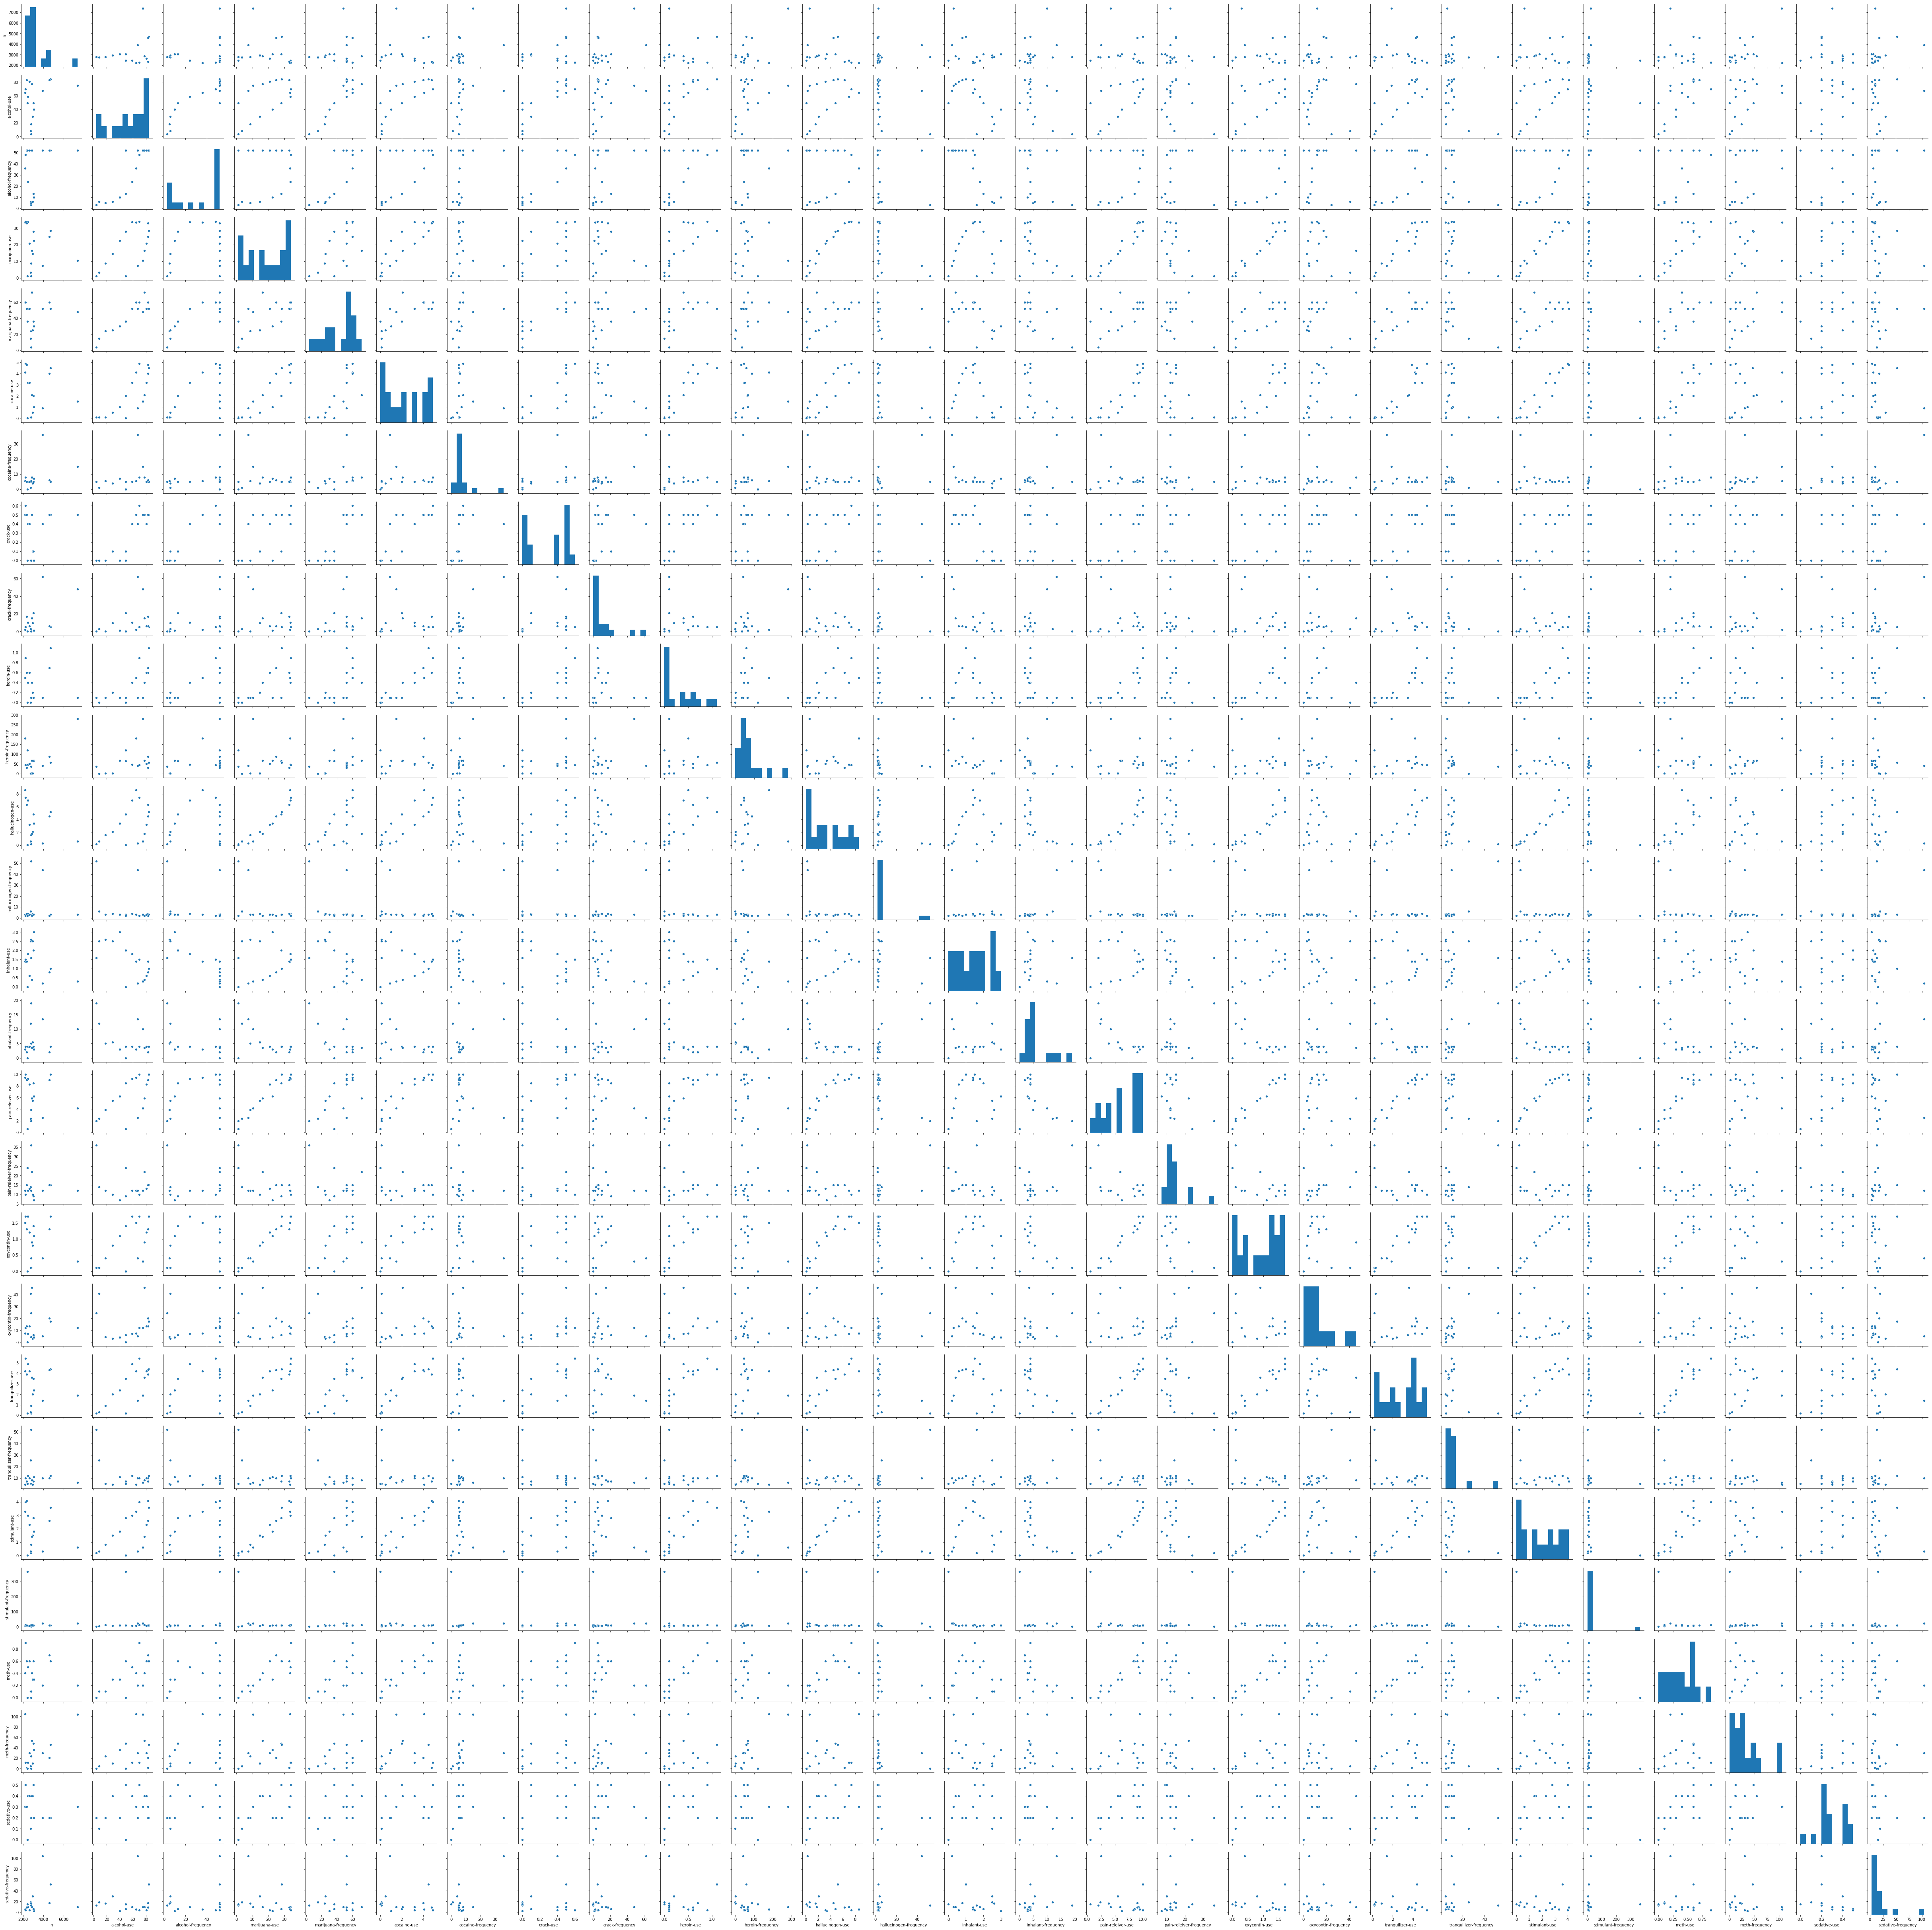

In [77]:
sns.pairplot(drug)

In [79]:
drug.groupby('age')[['n', 'alcohol-use', 'cocaine-use', 'crack-use', 'heroin-use','marijuana-use', 'hallucinogen-use', 'meth-use', 'pain-releiver-use', 'oxycontin-use', 'sedative-use', 'inhalant-use', 'stimulant-use', 'tranquilizer-use']].mean()

,n,alcohol-use,cocaine-use,crack-use,heroin-use,marijuana-use,hallucinogen-use,meth-use,pain-releiver-use,oxycontin-use,sedative-use,inhalant-use,stimulant-use,tranquilizer-use
age,,,,,,,,,,,,,,
12,2798,3.9,0.1,0.0,0.1,1.1,0.2,0.0,2.0,0.1,0.2,1.6,0.2,0.2
13,2757,8.5,0.1,0.0,0.0,3.4,0.6,0.1,2.4,0.1,0.1,2.5,0.3,0.3
14,2792,18.1,0.1,0.0,0.1,8.7,1.6,0.1,3.9,0.4,0.2,2.6,0.8,0.9
15,2956,29.2,0.5,0.1,0.2,14.5,2.1,0.3,5.5,0.8,0.4,2.5,1.5,2.0
16,3058,40.1,1.0,0.0,0.1,22.5,3.4,0.3,6.2,1.1,0.2,3.0,1.8,2.4
17,3038,49.3,2.0,0.1,0.1,28.0,4.8,0.6,8.5,1.4,0.5,2.0,2.8,3.5
18,2469,58.7,3.2,0.4,0.4,33.7,7.0,0.5,9.2,1.7,0.4,1.8,3.0,4.9
19,2223,64.6,4.1,0.5,0.5,33.4,8.6,0.4,9.4,1.5,0.3,1.4,3.3,4.2
20,2271,69.7,4.9,0.6,0.9,34.0,7.4,0.9,10.0,1.7,0.5,1.5,4.0,5.4


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [80]:
# I am going to explore a few variations on cocaine use by age.
# I will explore three samples, number of cocaine users 21 years and under, over 21 years and the entire population.
# My plan is to look at the difference between the mean and median number of cocaine users in these group.



In [81]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [82]:
druga = drug[['age', 'n', 'cocaine-use']]
druga

,age,n,cocaine-use
0,12,2798,0.1
1,13,2757,0.1
2,14,2792,0.1
3,15,2956,0.5
4,16,3058,1.0
5,17,3038,2.0
6,18,2469,3.2
7,19,2223,4.1
8,20,2271,4.9
9,21,2354,4.8


In [83]:
druga['cocaine_users'] = druga.n * (druga.loc[:,'cocaine-use']/100)
druga['cocaine_users'] = druga.cocaine_users.round(0)
druga['cocaine_users'] = druga.cocaine_users.astype(int)
druga
# not sure why I'm getting this box below telling me to do this different?

C:\Users\Snoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Snoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Snoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,age,n,cocaine-use,cocaine_users
0,12,2798,0.1,3
1,13,2757,0.1,3
2,14,2792,0.1,3
3,15,2956,0.5,15
4,16,3058,1.0,31
5,17,3038,2.0,61
6,18,2469,3.2,79
7,19,2223,4.1,91
8,20,2271,4.9,111
9,21,2354,4.8,113


In [84]:
druga = druga.rename(columns={'n': 'total_sample', 'cocaine-use': 'cocaine_use'})
druga

,age,total_sample,cocaine_use,cocaine_users
0,12,2798,0.1,3
1,13,2757,0.1,3
2,14,2792,0.1,3
3,15,2956,0.5,15
4,16,3058,1.0,31
5,17,3038,2.0,61
6,18,2469,3.2,79
7,19,2223,4.1,91
8,20,2271,4.9,111
9,21,2354,4.8,113


In [85]:
druga['age_c'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
list = ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23', '24-25', '26-29', '30-34',
        '35-49', '50-64', '65+']
length = len(list)

[Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22-23'),
 Text(0, 0, '24-25'),
 Text(0, 0, '26-29'),
 Text(0, 0, '30-34'),
 Text(0, 0, '35-49'),
 Text(0, 0, '50-64')]

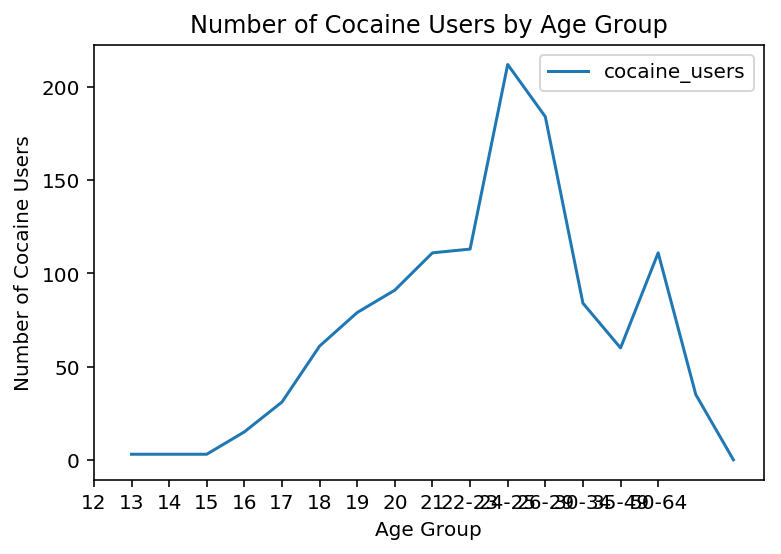

In [86]:
ax = druga.plot(x='age_c', y='cocaine_users', kind='line')
ax.set_title('Distribution of Cocaine Users')
ax.set_ylabel('Number of Cocaine Users')
ax.set_title('Number of Cocaine Users by Age Group')
ax.set_xlabel('Age Group')
ax.set_xticks(range(0,16))
ax.set_xticklabels(list)
# need to figure out how to rotate the labels on the x axis so its easy to read

In [87]:
total_pop = drug.n.sum()
print('the total population sampled is', total_pop)

the total population sampled is 55268


In [88]:
total_under_21 = druga.total_sample.iloc[0:10].sum()
total_cocaine_users = druga.iloc[:, 3].sum()
total_cocaine_under_21 = druga.iloc[0:10, 3].sum().sum()
total_over_21 = druga.total_sample.iloc[10:].sum()
total_cocaine_over_21 = druga.iloc[10:, 3].sum().sum()
print('the total cocaine users under 21 years old is', total_cocaine_under_21)
print('the total amount of people under 21 years old is', total_under_21)
print('the total amount of people over 21 years old is', total_over_21)
print('the total cocaine users over 21 years old is', total_cocaine_over_21)
print('the total cocaine users is', total_cocaine_users)
print('the total amount of people is', total_pop)

the total cocaine users under 21 years old is 510
the total amount of people under 21 years old is 26716
the total amount of people over 21 years old is 28552
the total cocaine users over 21 years old is 686
the total cocaine users is 1196
the total amount of people is 55268


In [89]:
c_pct_under_21 = total_cocaine_under_21 / total_under_21
c_pct_total = total_cocaine_users / total_pop
c_pct_over_21 = total_cocaine_over_21 / total_over_21

print('The percentage of people under 21 years old that use cocaine is', np.round(c_pct_under_21 * 100, decimals=2), '%')
print('The percentage of people over 21 years old that use cocaine is', np.round(c_pct_over_21 * 100, decimals=2), '%')
print('The percentage of people that use cocaine is', np.round(c_pct_total * 100, decimals=2), '%')

The percentage of people under 21 years old that use cocaine is 1.91 %
The percentage of people over 21 years old that use cocaine is 2.4 %
The percentage of people that use cocaine is 2.16 %


In [90]:
c_21_mean = druga.cocaine_users.iloc[0:10].mean()
c_21_std = druga.cocaine_users.iloc[0:10].std()
c_21_med = np.median(druga.cocaine_users.iloc[0:10])
c_21_sem = c_21_std / np.sqrt(total_cocaine_under_21)
print('The mean number of cocaine users under 21 years old is', c_21_mean)
print('The standard deviation of number of cocaine users under 21 years old is', c_21_std)
print('The median number of cocaine users under 21 years old is', c_21_med)
print('The standard error of number of cocaine users under 21 years old is', c_21_sem)

The mean number of cocaine users under 21 years old is 51.0
The standard deviation of number of cocaine users under 21 years old is 45.382326466980025
The median number of cocaine users under 21 years old is 46.0
The standard error of number of cocaine users under 21 years old is 2.0095631929798876


In [91]:
c_mean = np.mean(druga.cocaine_users)
c_med = np.median(druga.cocaine_users)
c_std = np.std(druga.cocaine_users)
c_sem = c_std / np.sqrt(total_cocaine_users)
print('The mean number of cocaine users is', c_mean)
print('The standard deviation of number of cocaine users is', c_std)
print('The median number of cocaine users is', c_med)
print('The standard error of number of cocaine users is', c_sem)

The mean number of cocaine users is 70.3529411764706
The standard deviation of number of cocaine users is 61.071742937852434
The median number of cocaine users is 61.0
The standard error of number of cocaine users is 1.7659350431081922


In [92]:
from scipy.stats import t

In [93]:
# H_0: mean cocaine users under 21 = median cocaine users under 21
# H_A: mean cocaine users under 21 != median cocaine users under 21
alpha = 0.05
sample_mean = c_21_mean
t_statistic = (sample_mean - c_21_med)/(c_21_std/total_cocaine_under_21**0.5)
p_value = t.sf(np.abs(t_statistic), total_cocaine_under_21) * 2 
print("Our sample median is", c_21_med)
print("Our sample mean is ", sample_mean)
print("Our t-statistic is ", t_statistic)
print("Our p-value is ", p_value)
if p_value < alpha:
    print("We reject our null hypothesis and conclude that the mean cocaine users under 21 value is different from the median cocaine users under 21 value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the mean cocaine users under 21 value is different from the median .")
else:
    print("Our test is inconclusive.")

Our sample median is 46.0
Our sample mean is  51.0
Our t-statistic is  2.4881028959262204
Our p-value is  0.013160835244566819
We reject our null hypothesis and conclude that the mean cocaine users under 21 value is different from the median cocaine users under 21 value.


In [94]:
from scipy.stats import t
## Step 1: Define hypotheses.
### H_0: mean cocaine users under 21 = mean cocaine users
### H_A: mean cocaine users under 21 != mean cocaine users
alpha = 0.05
sample_mean = c_21_mean
t_statistic = (sample_mean - c_mean)/(c_21_std/total_cocaine_under_21**0.5)
p_value = t.sf(np.abs(t_statistic), total_cocaine_under_21) * 2 
print("Our mean is", c_mean)
print("Our under 21 mean is ", sample_mean)
print("Our t-statistic is ", t_statistic)
print("Our p-value is ", p_value)
if p_value < alpha:
    print("We reject our null hypothesis and conclude that the mean cocaine users under 21 value is different from the mean cocaine users value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the mean cocaine users under 21 value is different from the mean cocaine users value.")
else:
    print("Our test is inconclusive.")

Our mean is 70.3529411764706
Our under 21 mean is  51.0
Our t-statistic is  -9.630421797173256
Our p-value is  2.793418989317093e-20
We reject our null hypothesis and conclude that the mean cocaine users under 21 value is different from the mean cocaine users value.


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.